In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [23]:
class LinearRegression:
    
    def __init__(self,lr=0.001,n_iters=1000):
        self.lr = lr
        self.iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self,X,y):
        # Initialise the parameters
        n_samples,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.iters):
            y_predicted = np.dot(X,self.weights) + self.bias
            dw = (1/n_samples)*np.dot(X.T,(y_predicted- y))
            db = (1/n_samples) * np.sum(y_predicted-y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            
    
    def predict(self,X):
        y_predicted = np.dot(X,self.weights) + self.bias
        return y_predicted
    
    

In [27]:
def mse(y_true,y_pred):
    return np.mean((y_true - y_pred)**2)

### Regression Test Script

In [38]:
X,y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=69)

### Data Visualisation

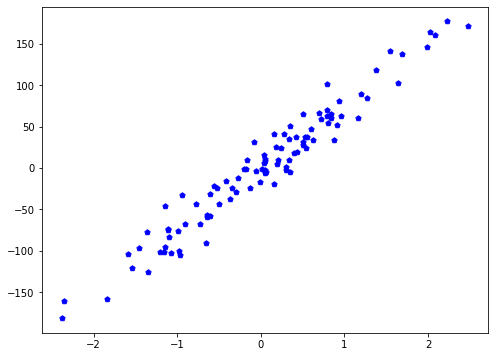

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y,color="b",marker="p",s=30)
plt.show()

In [42]:
lreg = LinearRegression(lr=0.01)
lreg.fit(X_train,y_train)
predictions = lreg.predict(X_test)

In [43]:
mse(y_test,predictions)

246.25036816509365

### Plot the Regressor Line

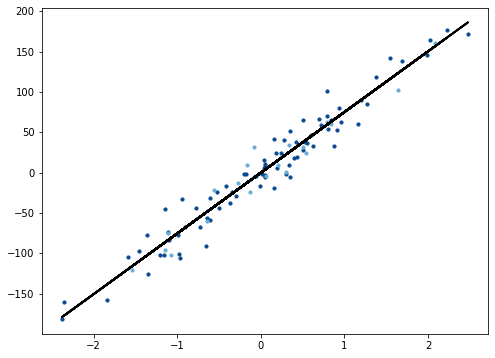

In [47]:
y_pred_line = lreg.predict(X)
cmap = plt.get_cmap('Blues')
plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train,y_train,color=cmap(0.9),s=10)
m2 = plt.scatter(X_test,y_test,color=cmap(0.5),s=10)
plt.plot(X,y_pred_line,color='black',linewidth=2,label='Prediction')
plt.show()

### Plot for different Learning rates

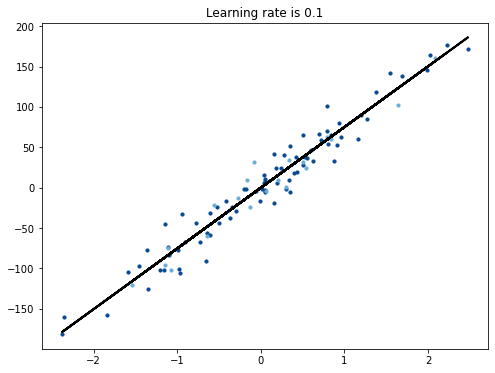

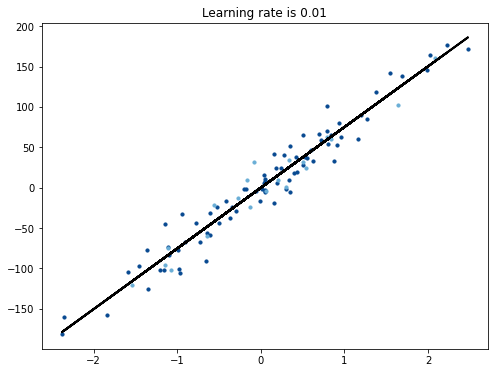

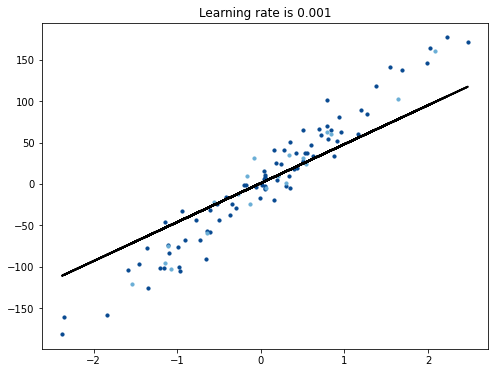

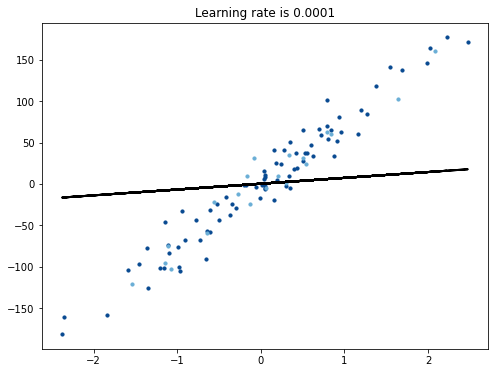

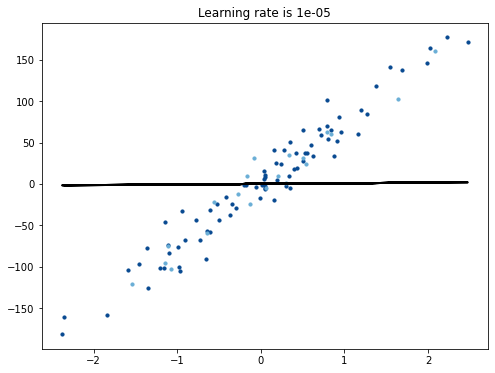

In [51]:
learning_rates = [0.1,0.01,0.001,0.0001,0.00001]
for rate in learning_rates:
    lreg = LinearRegression(lr=rate)
    lreg.fit(X_train,y_train)
    y_pred_line = lreg.predict(X)
    cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8,6))
    plt.title("Learning rate is "+str(rate))
    m1 = plt.scatter(X_train,y_train,color=cmap(0.9),s=10)
    m2 = plt.scatter(X_test,y_test,color=cmap(0.5),s=10)
    plt.plot(X,y_pred_line,color='black',linewidth=2,label='Prediction')
plt.show()